In [2]:
import numpy as np
import nilearn.plotting as nplt
import nibabel as nib
import matplotlib.pyplot as plt
import os.path as op
from  nilearn.datasets import fetch_surf_fsaverage
from  nilearn import image
import pandas as pd 
import os

fsaverage = fetch_surf_fsaverage() #fsavergae5 by default

bids_folder = '/mnt_03/ds-dnumrisk' 
grad_folder = 'derivatives/gradients'
subList = [f[4:6] for f in os.listdir(bids_folder) if f[0:4] == 'sub-' and len(f) == 6]


In [3]:
from utils import get_basic_mask

mask, labeling_noParcel = get_basic_mask()
N_vertices = len(np.where(mask==True)[0])

In [4]:
N_vertices

18715

In [14]:
from utils import cleanTS
import warnings
warnings.filterwarnings("ignore")

remove_task_effects = False
ses=1
N_vertices = 20484
av_snr = np.zeros(N_vertices)

N_subs = len(subList)
for sub in subList:
    try:
        ts = cleanTS(sub, ses,remove_task_effects, bids_folder=bids_folder) # space = 'fsaverage5'
        snr = np.mean(ts, axis=1)/np.std(ts, axis=1) + np.mean(ts, axis=1)
        av_snr += snr
        print(f'sub-{sub} worked :)')
    except:
        print(f'sub-{sub} did not work')
        N_subs += -1

av_snr = av_snr/N_subs

sub-21 worked :)
sub-59 worked :)
sub-54 worked :)
sub-15 worked :)
sub-52 worked :)
sub-08 worked :)
sub-57 worked :)
sub-50 worked :)
sub-36 worked :)
sub-56 worked :)
sub-02 worked :)
sub-22 worked :)
sub-01 worked :)
sub-19 worked :)
sub-23 worked :)
sub-06 worked :)
sub-18 worked :)
sub-13 worked :)
sub-03 worked :)
sub-31 worked :)
sub-55 worked :)
sub-41 worked :)
sub-65 worked :)
sub-49 worked :)
sub-29 worked :)
sub-34 worked :)
sub-17 worked :)
sub-27 worked :)
sub-30 worked :)
sub-51 worked :)
sub-20 worked :)
sub-66 worked :)
sub-24 worked :)
sub-46 worked :)
sub-39 worked :)
sub-47 did not work
sub-14 worked :)
sub-37 worked :)
sub-04 worked :)
sub-61 worked :)
sub-45 worked :)
sub-26 worked :)
sub-58 worked :)
sub-33 worked :)
sub-40 worked :)
sub-64 worked :)
sub-32 worked :)
sub-11 worked :)
sub-35 worked :)
sub-16 worked :)
sub-38 worked :)
sub-48 worked :)
sub-63 worked :)
sub-43 worked :)
sub-10 worked :)
sub-53 did not work
sub-05 did not work
sub-07 worked :)
sub-0

In [13]:
av_surf_noMeanadded = av_surf

In [15]:
snr_r = np.split(av_snr,2)[1] #  0 = left, 1 = right

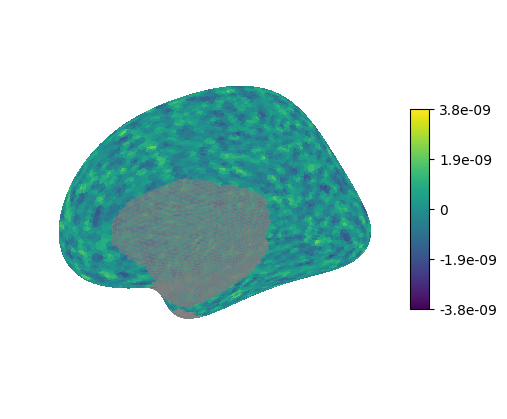

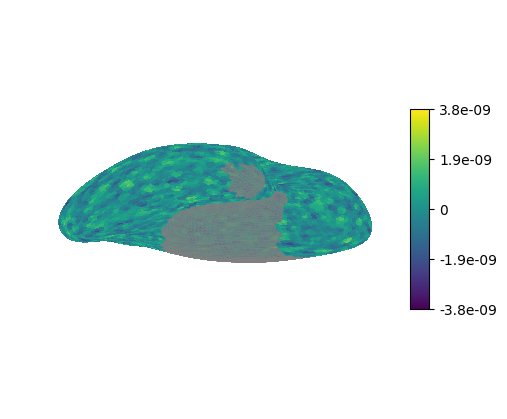

In [16]:
cmap = 'viridis' #  cmap_marg #
surf_mesh = fsaverage.infl_right

snr = snr_r

view = 'lateral'
nplt.plot_surf_stat_map(surf_mesh=surf_mesh, stat_map=snr,cmap=cmap,view=view)
plt.show()
view = 'ventral'
nplt.plot_surf_stat_map(surf_mesh=surf_mesh, stat_map=snr,cmap=cmap,view=view)
plt.show()

In [19]:
# single subject
sub = '02'
ses = 1
task='magjudge'
run=1
space = 'fsaverage5'
hemi = 'R'
ex_file = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', f'sub-{sub}_ses-{ses}_task-{task}_run-1_space-{space}_hemi-{hemi}_bold.func.gii') 

ts = nib.load(ex_file).agg_data()
print(ts.shape)


from nilearn import signal

fmriprep_confounds_include = ['global_signal', 'dvars', 'framewise_displacement', 'trans_x',
                'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
                'a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'cosine00', 'cosine01', 'cosine02'
                ]

fmriprep_confounds_file = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_desc-confounds_timeseries.tsv')
fmriprep_confounds = pd.read_table(fmriprep_confounds_file)[fmriprep_confounds_include] 
fmriprep_confounds= fmriprep_confounds.fillna(method='bfill')

clean_ts = signal.clean(ts.T, confounds=fmriprep_confounds).T

snr_clean = (np.mean(clean_ts, axis=1)/np.std(clean_ts, axis=1)) + np.mean(ts, axis=1)

(10242, 188)


In [27]:
# only 1 run! 

from nilearn import signal

av_snr = np.zeros(int(N_vertices/2))
N_subs = len(subList)

for sub in subList:
    try:
        ex_file = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', f'sub-{sub}_ses-{ses}_task-{task}_run-1_space-{space}_hemi-{hemi}_bold.func.gii') 

        ts = nib.load(ex_file).agg_data()
        #print(ts.shape)
        fmriprep_confounds_include = ['global_signal', 'dvars', 'framewise_displacement', 'trans_x',
                        'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
                        'a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'cosine00', 'cosine01', 'cosine02'
                        ]

        fmriprep_confounds_file = op.join(bids_folder,'derivatives', 'fmriprep', f'sub-{sub}', f'ses-{ses}', 'func', f'sub-{sub}_ses-{ses}_task-{task}_run-{run}_desc-confounds_timeseries.tsv')
        fmriprep_confounds = pd.read_table(fmriprep_confounds_file)[fmriprep_confounds_include] 
        fmriprep_confounds= fmriprep_confounds.fillna(method='bfill')

        clean_ts = signal.clean(ts.T, confounds=fmriprep_confounds).T

        snr_clean = (np.mean(clean_ts, axis=1)/np.std(clean_ts, axis=1)) + np.mean(ts, axis=1)
        av_snr += snr_clean
        
        print(f'sub-{sub} worked :)')
    except:
        print(f'sub-{sub} did not work')
        N_subs += -1

av_snr = av_snr/N_subs

(10242, 188)
sub-21 worked :)
(10242, 188)
sub-59 worked :)
(10242, 188)
sub-54 worked :)
(10242, 188)
sub-15 worked :)
(10242, 188)
sub-52 worked :)
(10242, 188)
sub-08 worked :)
(10242, 188)
sub-57 worked :)
(10242, 188)
sub-50 worked :)
(10242, 188)
sub-36 worked :)
(10242, 188)
sub-56 worked :)
(10242, 188)
sub-02 worked :)
(10242, 188)
sub-22 worked :)
(10242, 188)
sub-01 worked :)
(10242, 188)
sub-19 worked :)
(10242, 188)
sub-23 worked :)
(10242, 188)
sub-06 worked :)
(10242, 188)
sub-18 worked :)
(10242, 188)
sub-13 worked :)
(10242, 188)
sub-03 worked :)
(10242, 188)
sub-31 worked :)
(10242, 188)
sub-55 worked :)
(10242, 188)
sub-41 worked :)
(10242, 188)
sub-65 worked :)
(10242, 188)
sub-49 worked :)
(10242, 188)
sub-29 worked :)
(10242, 188)
sub-34 worked :)
(10242, 188)
sub-17 worked :)
(10242, 188)
sub-27 worked :)
(10242, 188)
sub-30 worked :)
(10242, 188)
sub-51 worked :)
(10242, 188)
sub-20 worked :)
(10242, 188)
sub-66 worked :)
(10242, 188)
sub-24 worked :)
(10242, 18

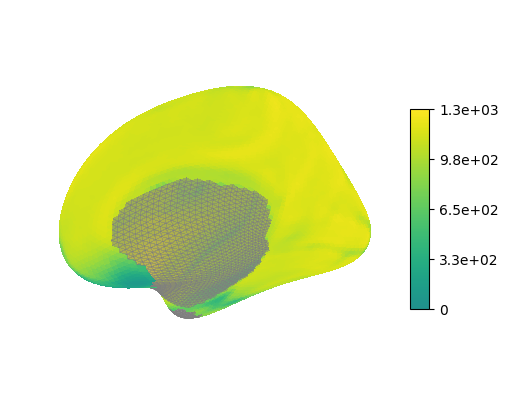

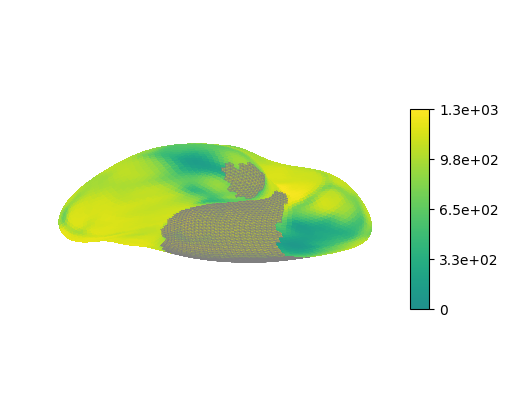

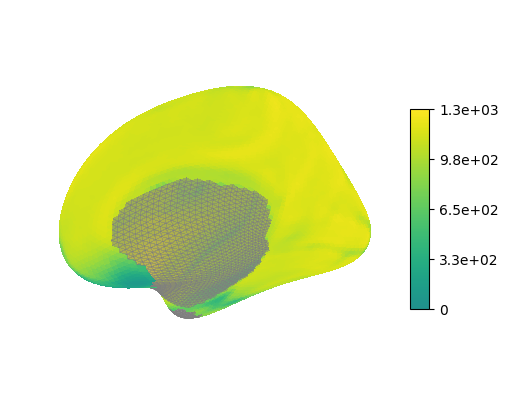

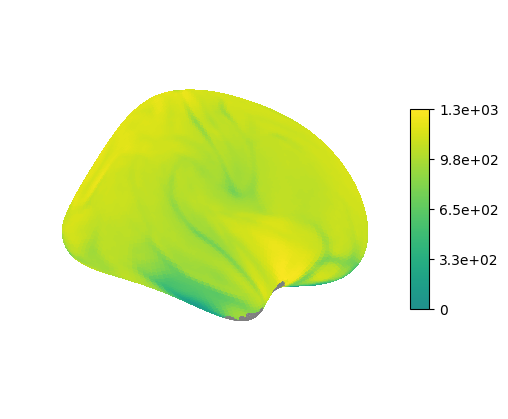

In [29]:
snr_clean = av_snr
nplt.plot_surf_stat_map(surf_mesh=surf_mesh, stat_map=snr_clean,cmap='viridis',view='lateral')
plt.show()
view = 'ventral'
nplt.plot_surf_stat_map(surf_mesh=surf_mesh, stat_map=snr_clean,cmap='viridis',view=view)
plt.show()
view = 'lateral'
nplt.plot_surf_stat_map(surf_mesh=surf_mesh, stat_map=snr_clean,cmap='viridis',view=view)
plt.show()
view = 'medial'
nplt.plot_surf_stat_map(surf_mesh=surf_mesh, stat_map=snr_clean,cmap='viridis',view=view)
plt.show()